# Métodos basados en distancias aplicados en un análisis médico

## 1. Introducción

En medicina del envejecimiento se estudia el concepto de fragilidad como un constructo que incluye las actividades básicas y las instrumentales de la vida diaria, el estado de salud, las características psicológicas, etc. En general, se estudian un conjunto de variables binarias que indican la presencia o no de déficits.

Analizaremos datos correspondientes a una muestra longitudinal en un estudio de ancianos que abarca el año 2012 y 2015. Se tiene, entre otras muchas variables, la información de los déficits en 2012 y si el individuo muere o no entre el 2012 y 2015 a partir de la información del 2015.


## 2. Conjunto de datos



Tenemos el conjunto de datos `Base_esp.dta` que incluye la muerte o no de los individuos entre el 2012 y 2015 (variable fallecido_15) a partir de un conjunto de 35 déficits.

In [ ]:
# Importamos librería pandas
import pandas as pd

# Cargamos nuestro dataset
datos = pd.read_stata("Base_esp.dta")
datos

,unhhid,cunicah,codent01,subhog_01,acthog,codent03,subhog_03,np,subhog_12,subhog_15,...,c19_12_d,e1b_12_d,c69a_12_d,c70_12_d,c50b_12_d,age_12_cat,tiempo_cancer,c12_12_menos10_d,frail_index,quant
0,1.0,1.0,Selected person,00.Baseline HH,"Neither separation nor death, no new spouse",Selected person in 2001,"01.No change, HH contains NP=010",10,"01.No change, HH contains NP=010",31.NP=010 Deceased,...,0.0,1.0,1.0,0.0,1.0,>=50,NaN,0.0,0.400000,3.0
1,1.0,1.0,Spouse of selected person,00.Baseline HH,"Neither separation nor death, no new spouse",Spouse of selected person in 2001,"01.No change, HH contains NP=010",20,"01.No change, HH contains NP=010",12.New HH contains NP=020,...,0.0,0.0,0.0,0.0,1.0,>=50,NaN,0.0,0.028571,1.0
2,2.0,2.0,Selected person,00.Baseline HH,"Neither separation nor death, no new spouse",Selected person in 2001,"01.No change, HH contains NP=010",10,"01.No change, HH contains NP=010","01.No change, HH contains NP=010",...,0.0,0.0,0.0,0.0,0.0,>=50,NaN,0.0,0.200000,2.0
3,2.0,2.0,Spouse of selected person,00.Baseline HH,"Neither separation nor death, no new spouse",Spouse of selected person in 2001,"01.No change, HH contains NP=010",20,"01.No change, HH contains NP=010","01.No change, HH contains NP=010",...,0.0,NaN,NaN,NaN,NaN,>=50,NaN,0.0,NaN,NaN
4,3.0,3.0,Selected person,00.Baseline HH,"Neither separation nor death, new spouse",Selected person in 2001,11.New HH contains NP=010,10,"01.No change, HH contains NP=010","01.No change, HH contains NP=010",...,0.0,0.0,0.0,0.0,1.0,>=50,NaN,0.0,0.114286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,15128.0,15128.0,NaN,99.Not yet part of the study,NaN,NaN,99.Not yet part of the study,10,00.Baseline HH,"01.No change, HH contains NP=010",...,0.0,1.0,0.0,0.0,0.0,>=50,NaN,0.0,NaN,NaN
14703,15128.0,15128.0,NaN,99.Not yet part of the study,NaN,NaN,99.Not yet part of the study,20,00.Baseline HH,"01.No change, HH contains NP=010",...,0.0,0.0,0.0,0.0,1.0,>=50,NaN,0.0,0.085714,1.0
14704,15129.0,15129.0,NaN,99.Not yet part of the study,NaN,NaN,99.Not yet part of the study,10,00.Baseline HH,"01.No change, HH contains NP=010",...,0.0,1.0,0.0,0.0,0.0,>=50,NaN,0.0,0.085714,1.0
14705,15129.0,15129.0,NaN,99.Not yet part of the study,NaN,NaN,99.Not yet part of the study,20,00.Baseline HH,"01.No change, HH contains NP=010",...,0.0,1.0,0.0,0.0,1.0,>=50,NaN,0.0,0.171429,2.0


A continuación, **seleccionaremos únicamente las variables que serán objeto de nuestro estudio**, y les asignaremos nombres más descriptivos.

De tal forma, las variables indican:
* Dificultad (valor 1) o no (valor cero) para vestirse, levantarse de una silla, caminar, comer, arreglarse, ir al baño, levantar cosas pesadas, hacer las compras, cocinar sus alimentos, tomar sus medicamentos, manejar sus finanzas, caminar, tomar objetos, ejercitarse
* Pérdida de peso inexplicable, problemas de salud, cambios de salud, dificultad para levantarse de la cama, sentirse cansado, sentir que todo es un esfuerzo, estar o no deprimido, ser infeliz, sentirse solo, sentirse sin energía, tener desde el último seguimiento presión arterial alta, ataque cardíaco, falla crónica del corazón, embolia, cáncer, diabetes, artritis, problemas pulmonares, fallas de memoria, tener anorexia, si hay reporte de muerte entre el 2012 y 2015

A este nuevo conjunto de datos le llamaremos `datos2`.

In [ ]:
# Seleccionamos solo las variables que estudiaremos

# Definimos la lista de variables
vars2 = [ "h13_12_d_2", "h5_12_d_2", "h15d_12_d", "h17d_12_d", "h16d_12_d", "h19d_12_d", "h7_12_d_2", "h11_12_d_2", "h27c_12_d_2", "h26c_12_d_2",
           "h28c_12_d_2", "h29c_12_d_2", "c64_12_d", "c1_12_d", "c2a_12_d", "c73_12_d", "c49_8_12_d", "h3_12_d_2", "c49_2_12_d", "c49_1_12_d",
            "c49_4_12_d", "c49_5_12_d", "c49_9_12_d", "c4_12_d", "c22a_12_d", "c25b_12_d", "c26_12_d", "c12_12_menos10_d", "c6_12_d", "c32_12_d",
            "c19_12_d", "e1b_12_d", "c69a_12_d", "fallecido_15", "c70_12_d", "c50b_12_d" ]

# Seleccionamos las nuevas variables en nuestro dataset
datos2 = datos[vars2]

# Cambiamos los nombres de las columnas a nombres más descriptivos
new_cols = [ "Dress", "In_out_chair", "Walk", "Eat", "Groom", "Toilet", "Stairs", "Lift", "Shop", "Meals", "Meds", "Finance",
                    "Lost_weight", "Health", "H_change", "Bed", "Tired", "Walk_out", "Effort", "Depressed", "No_Happy", "Lone",
                    "No_Energy", "High_BP", "Heart_attack", "CHF", "Stroke", "Cancer", "Diabetes", "Arthritis", "CLD", "Memory",
                     "Grip", "Dead", "Anorexia", "Exercise" ]

# Asignamos los nuevos nombres de columnas
datos2.columns = new_cols

# Visualizamos el dataset
datos2

,Dress,In_out_chair,Walk,Eat,Groom,Toilet,Stairs,Lift,Shop,Meals,...,Stroke,Cancer,Diabetes,Arthritis,CLD,Memory,Grip,Dead,Anorexia,Exercise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 3. Clasificador tipo KNN

El objetivo es construir un clasificador tipo KNN para determinar si nuevos individuos en una ola del estudio estarán en más posibilidad de morir o no para la siguiente ola. Esto permite la posibilidad de implementar una intervención que disminuya ese riesgo.

Como se considera que los datos perdidos corresponden a un esquema completamente al azar (MCAR), eliminaremos todas aquellas observaciones con pérdidas en cualquiera de las variables.

In [ ]:
# Eliminamos NA
datos2 = datos2.dropna()
# Como son 0s y 1s, cambiamos el tipo de datos a entero
datos2 = datos2.astype('int')
# Visualizamos dataset
datos2

,Dress,In_out_chair,Walk,Eat,Groom,Toilet,Stairs,Lift,Shop,Meals,...,Stroke,Cancer,Diabetes,Arthritis,CLD,Memory,Grip,Dead,Anorexia,Exercise
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14701,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
14703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, f1_score, confusion_matrix



Como la variable `Dead` es la que indica si la persona murió o no, ese será el output que querremos predecir. Es decir, a partir de los 35 posibles déficits (inputs) determinaremos, a través del método k vecinos más cercanos (KNN), si el paciente podría fallecer, y así prevenirlo de alguna forma.

In [ ]:
# Inputs (déficits)
X = datos2.drop(columns=['Dead'])
# Output (muerte)
y = datos2['Dead']

Dividiremos el conjunto de datos en muestra de entrenamiento (75%) y prueba (25%), que es el default.

In [ ]:
# División entrenamiento-prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Dimensiones de la muestra de prueba y entrenamiento para inputs y outputs
print("Dimensiones Input: ", X_train.shape) #input de entrenamiento
print("Dimensión Output: ", y_train.shape) #output de entrenamiento
print("\nDimensión Output Prueba: ", y_test.shape) #output de prueba

Dimensiones Input:  (8237, 35)
Dimensión Output:  (8237,)

Dimensión Output Prueba:  (2746,)


KNeighborsClassifier calcula para la muestra de prueba la distancia a los elementos en la muestra de entrenamiento y se usan los k más cercanos para seleccionar el output de acuerdo a en cuál valor se encuentra la mayoría de los k vecinos (majorie vote).

Por default es la distancia Euclideana, se usa la de Minkowski con p=2 que es lo mismo, se puede agregar un ponderador, weigth, por ejemplo más peso a los más cercanos con weigths=distance.



### Mejor valor de k

Usaremos **validación cruzada** para encontrar el mejor valor de k, es decir, el que mayor precisión da a nuestro modelo.

La precisión es la proporción de verdaderos positivos entre todos los casos clasificados como positivos por el modelo. Si la precisión es alta, asegura que las predicciones positivas (predicciones de fallecimiento) son realmente precisas y no falsas alarmas.



Para ello, en la función cross_val_score() de sklearn especificaremos scoring = 'precision'.

El mejor valor de k: 8


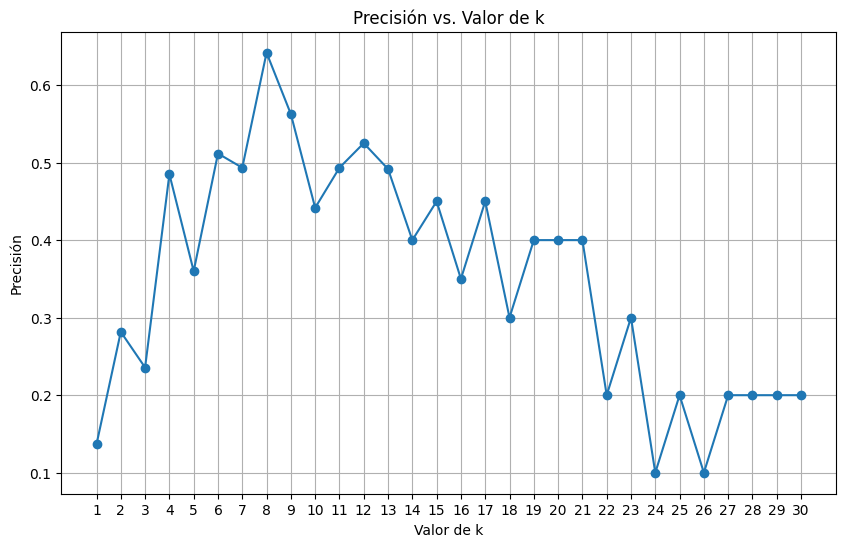

In [ ]:
# Definimos el rango de valores para k
k_values = range(1, 31)

# (Ignoramos advertencias)
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Lista para almacenar las precisiones medias
precision_scores = []

# Realizamos validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='precision')
    precision_scores.append(scores.mean())

# Encontramos el valor de k con la mejor precisión
best_k = k_values[np.argmax(precision_scores)]
print(f'El mejor valor de k: {best_k}')

# Graficamos la precisión frente a los valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, marker='o')
plt.title('Precisión vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Repetiremos el proceso, esta vez usando como métrica la sensibilidad (sensitivity o recall) del modelo. Así, encontraremos el valor de k para el cual nuestro modelo tiene el mayor puntaje de sensibilidad. Es decir, la proporción de verdaderos positivos (personas que realmente fallecieron) correctamente identificados por el modelo.

Para ello, en la función cross_val_score() de sklearn especificaremos scoring = 'recall'.

El mejor valor de k: 1


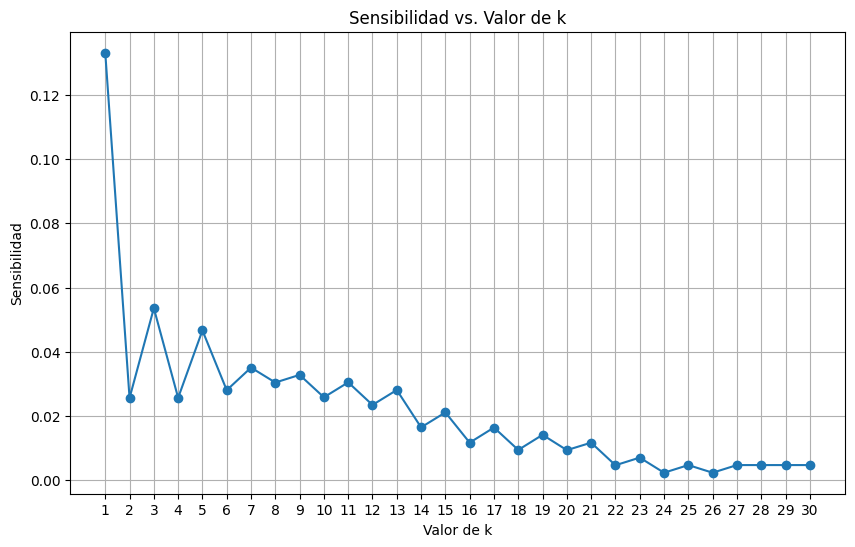

In [ ]:
# Definir el rango de valores para k
k_values = range(1, 31)

# Lista para almacenar los scores de sensibilidad
recall_scores = []

# Realizamos validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
    recall_scores.append(scores.mean())

# Encontramos el valor de k con la mejor sensibilidad
best_k = k_values[np.argmax(recall_scores)]
print(f'El mejor valor de k: {best_k}')

# Graficamos la sensibilidad frente a los valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_scores, marker='o')
plt.title('Sensibilidad vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Sensibilidad')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Vemos que cuando k=1, la sensibilidad es la máxima (0.13 aprox). Como esto indica que es un mal modelo, ya que no detecta la mayoría de los casos de fallecimiento (solo un 13%), vamos a probar a aplicar un balanceo de clases con SMOTE.

El mejor valor de k: 25


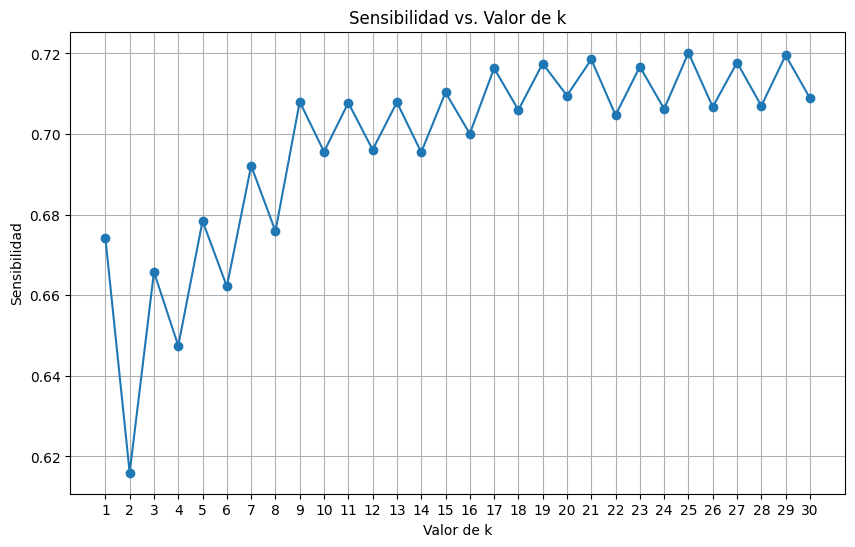

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import make_scorer, recall_score, precision_score
# Quitamos los warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir el rango de valores para k
k_values = range(1, 31)

# Lista para almacenar las sensibilidades medias
recall_scores = []

# Creamos un scorer personalizado que maneje el parámetro zero_division
recall_scorer = make_scorer(recall_score, zero_division=0)

# Realizamos validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_resampled, cv=10, scoring=recall_scorer)
    recall_scores.append(scores.mean())

# Encontramos el valor de k con la mejor sensibilidad
best_k = k_values[np.argmax(recall_scores)]
print(f'El mejor valor de k: {best_k}')

# Graficamos la sensibilidad frente a los valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_scores, marker='o')
plt.title('Sensibilidad vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Sensibilidad')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Como vemos que la sensibilidad aumentó significativamente, probamos este balanceo de clases para determinar la precisión.

El mejor valor de k: 24


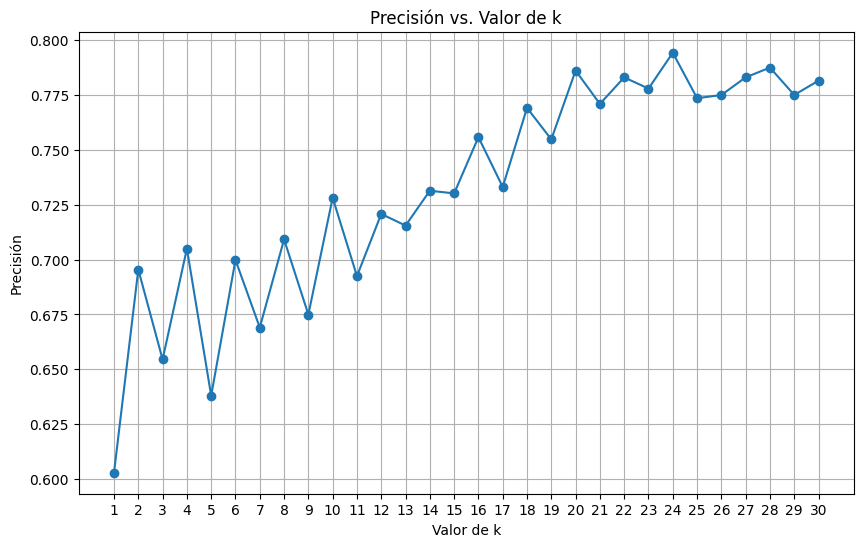

In [ ]:
# Quitamos los warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Combinamos X_train e y_train en un solo DataFrame
df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='y_train')], axis=1)

# Separamos las clases mayoritaria y minoritaria
df_majority = df[df['y_train'] == 0]
df_minority = df[df['y_train'] == 1]

# Submuestreamos la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # No reemplazamos las instancias
                                   n_samples=len(df_minority),  # Hacemos el número de instancias igual al de la clase minoritaria
                                   random_state=42)  # Reproducibilidad

# Combinamos las clases minoritaria y submuestreada
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separamos X e y
X_train_downsampled = df_downsampled.drop(columns=['y_train'])
y_train_downsampled = df_downsampled['y_train']

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Definimos el rango de valores para k
k_values = range(1, 31)

# Lista para almacenar las precisiones medias
precision_scores = []

# Creamos un scorer personalizado que maneje el parámetro zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)

# Realizamos validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train_downsampled, cv=10, scoring=precision_scorer)
    precision_scores.append(scores.mean())

# Encontramos el valor de k con la mejor precisión
best_k = k_values[np.argmax(precision_scores)]
print(f'El mejor valor de k: {best_k}')

# Graficamos la precisión frente a los valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision_scores, marker='o')
plt.title('Precisión vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Vemos que, aplicando SMOTE, la sensibilidad puede llegar a alcanzar un valor de más de 0.8 cuando k=30. En este caso, nuestro modelo acertaría clasificando la gran mayoría de los casos de fallecimiento.


Ya tenemos que el valor óptimo para maximizar la precisión de nuestro modelo es de k=30, con el que obtendríamos una precisión de más del 80%, lo que indicaría que la gran mayoría de predicciones de fallecimiento son precisas, y no falsas alarmas.

### Conclusión de modelo KNN


Como lo que más nos interesa en nuestro modelo es la precisión, para poder prevenir los posibles fallecimientos de personas en el futuro, creamos nuestro clasificador de k vecinos más cercanos usando k=25.

Nuestro modelo quedaría de la siguiente forma:

In [ ]:
# Quitamos los warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Combinamos X_train e y_train en un solo DataFrame
df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='y_train')], axis=1)

# Separamos las clases mayoritaria y minoritaria
df_majority = df[df['y_train'] == 0]
df_minority = df[df['y_train'] == 1]

# Submuestreamos la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # No reemplazamos las instancias
                                   n_samples=len(df_minority),  # Hacemos el número de instancias igual al de la clase minoritaria
                                   random_state=42)  # Reproducibilidad

# Combinamos las clases minoritaria y submuestreada
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Separamos X e y
X_train_downsampled = df_downsampled.drop(columns=['y_train'])
y_train_downsampled = df_downsampled['y_train']

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)


# Creamos un scorer personalizado que maneje el parámetro zero_division
precision_scorer = make_scorer(precision_score, zero_division=0)


# Realizamos validación cruzada con k=25
knn = KNeighborsClassifier(n_neighbors=25)


Evaluamos las métricas de nuestro modelo:

In [ ]:

# Entrenamos el modelo con los datos balanceados y escalados
knn.fit(X_train_scaled, y_train_downsampled)

# Realizamos predicciones en el conjunto de entrenamiento
y_train_pred = knn.predict(X_train_scaled)

# Calculamos precisión y recall en el conjunto de entrenamiento
train_precision = precision_score(y_train_downsampled, y_train_pred, zero_division=0)
train_recall = recall_score(y_train_downsampled, y_train_pred, zero_division=0)

# Realizamos predicciones en el conjunto de prueba
y_test_pred = knn.predict(X_test_scaled)

# Calculamos precisión y recall en el conjunto de prueba
test_precision = precision_score(y_test, y_test_pred, zero_division=0)
test_recall = recall_score(y_test, y_test_pred, zero_division=0)

# Imprimimos los resultados
print(f'Precisión en el conjunto de entrenamiento: {train_precision:.2f}')
print(f'Recall en el conjunto de entrenamiento: {train_recall:.2f}')
print(f'Precisión en el conjunto de prueba: {test_precision:.2f}')
print(f'Recall en el conjunto de prueba: {test_recall:.2f}')

# Calculamos y mostrar el F1 Score y la Matriz de Confusión en el conjunto de prueba
test_f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f'F1 Score en el conjunto de prueba: {test_f1:.2f}')
print('Matriz de Confusión en el conjunto de prueba:')
print(cm)


Precisión en el conjunto de entrenamiento: 0.80
Recall en el conjunto de entrenamiento: 0.46
Precisión en el conjunto de prueba: 0.15
Recall en el conjunto de prueba: 0.38
F1 Score en el conjunto de prueba: 0.22
Matriz de Confusión en el conjunto de prueba:
[[2284  316]
 [  90   56]]


Resulta que en el conjunto de entrenamiento, las métricas del modelo son muy buenas. No tanto en las del conjunto de prueba, por lo tanto, tenemos que hay un sobreajuste bastante grande en el modelo.


Esto sugiere que **KNN podría no ser el modelo más adecuado para este problema**, especialmente dado el fuerte desequilibrio de clases y las características del dataset.

Puede ser por:

* Desequilibrio de clases extremo: Los datos tienen muchos más casos negativos (Dead=0) que positivos, lo que dificulta la predicción de la clase minoritaria incluso con técnicas como SMOTE.

* Naturaleza de KNN: Este modelo es sensible a la densidad de las clases en el espacio de características. Si los datos de la clase minoritaria están dispersos, KNN no los clasifica bien.

* Características poco informativas: Algunas variables pueden no ser útiles para diferenciar las clases. Técnicas como la selección de un número más pequeño de características o modelos más robustos podrían funcionar mejor.

Alternativas para mejorar el modelo:

* Probar modelos más robustos de tipo Random Forest o Gradient Boosting (como XGBoost, LightGBM), que manejan mejor los desequilibrios de clases y permiten ajustes como pesos de clase.

* Regresión logística con penalización, ajustando pesos para clases desequilibradas.

* Probar algoritmos de selección de características como RFE (Recursive Feature Elimination).

* Usar correlaciones y métricas de importancia para eliminar variables poco informativas.

## 4. Clasificador tipo K means

Determinaremos con K-means si a partir de los déficits que integran el conjunto de fragilidad se pueden identificar grupos de individuos con características similares, y de esta forma determinar si hay grupos de individuos con fragilidad similar.

Para ello generaremos conglomerados a partir de k-means, escogiendo el más indicado a partir del indicador de silueta.

In [ ]:
# Importamos las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Mejor valor de k

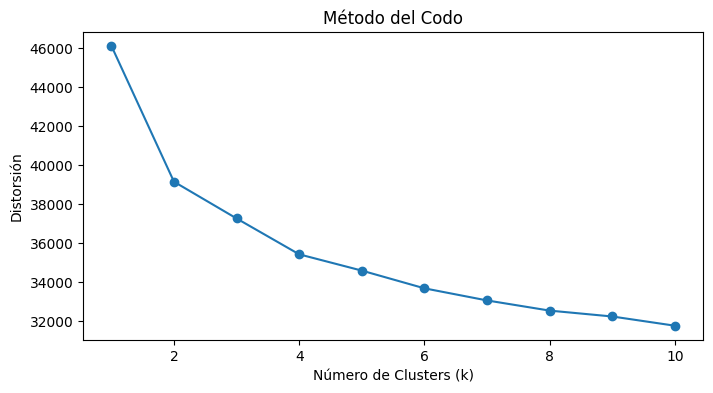

In [ ]:
distortions = []
K = range(1, 11)  # Probamos con 10 conglomerados

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Suma de las distancias al cuadrado dentro de los clústeres
# Ejecutamos el método del codo para escoger el número de k
# Graficamos la "Elbow Method" (método del codo)
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorsión')
plt.show()

Según vemos, el valor de k a partir de este gráfico puede decirse que es k= 2, es donde la pendiente cambia de inclinación de manera más acentuada.

Ahora vamos a calcular la métrica de la silueta con diferentes valores de k y evaluaremos cuál es la que mejor se ajusta.

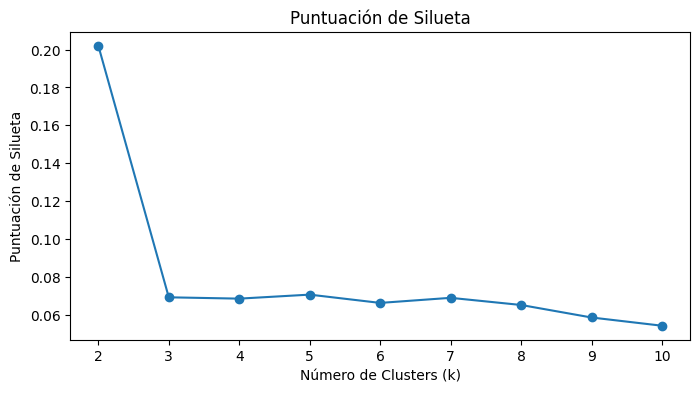

In [ ]:
silueta_scores = []
for k in range(2, 11):  # La silueta requiere al menos 2 clústeres
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silueta_scores.append(score)

# Graficamos la silueta
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silueta_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de Silueta')
plt.show()

In [ ]:
print({f'k= 2': silueta_scores[0]})
print({f'k= 3': silueta_scores[1]})


{'k= 2': 0.20202911448844801}
{'k= 3': 0.06920505915361351}


En este gráfico vemos que la métrica de la silueta donde mejor se define es para k = 2. Apartir de ahí, solo el resto de valores es de silueta similar y los cambios entre ellos no son significativos.

Aun así, veamos qué sucede con k=3

### Modelo con k=3

In [ ]:
k_select = 3
#Aplicamos  K-means con el k seleccionado
kmeans_select = KMeans(n_clusters= k_select, random_state=42)
X['clusters_k=3'] = kmeans_select.fit_predict(X)

In [ ]:
print(X['clusters_k=3'].value_counts().sort_values())

clusters_k=3
1    3214
0    3446
2    4323
Name: count, dtype: int64


En el código anterior vemos cómo hemos separado los datos en tres clústeres, dos de ellos de tamaño similar y un tercero ligeramente mayor, veamos ahora cuáles son las características de estos clústeres.

Para ello, vamos a graficar el comportamiento de las variables en cada clúster e identificar las variables que más destacan.

Con el siguiente código, calcularemos la media de cada una de las variables para cada clúster. Al ser binarias, no hay outliers.

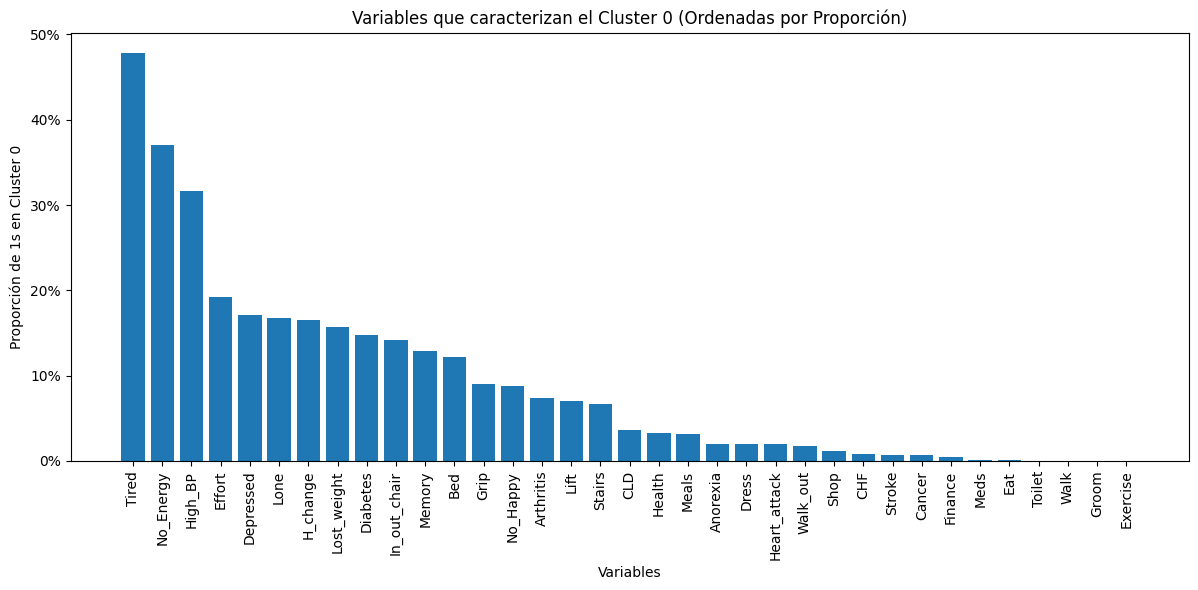

DataFrame for Cluster 0:

           index  Cluster 0
16         Tired   0.477945
22     No_Energy   0.369994
23       High_BP   0.316889
18        Effort   0.192687
19     Depressed   0.171213
21          Lone   0.168021
14      H_change   0.164829
12   Lost_weight   0.157574
28      Diabetes   0.147127
1   In_out_chair   0.142194
31        Memory   0.128845
15           Bed   0.121880
32          Grip   0.090250
20      No_Happy   0.087348
29     Arthritis   0.073418
7           Lift   0.070226
6         Stairs   0.066454
30           CLD   0.035984
13        Health   0.032211
9          Meals   0.031341
33      Anorexia   0.019733
0          Dress   0.019443
24  Heart_attack   0.019443
17      Walk_out   0.017411
8           Shop   0.012188
25           CHF   0.008416
26        Stroke   0.007255
27        Cancer   0.007255
11       Finance   0.004353
10          Meds   0.001161
3            Eat   0.000580
5         Toilet   0.000290
2           Walk   0.000290
4          Groom   0.0

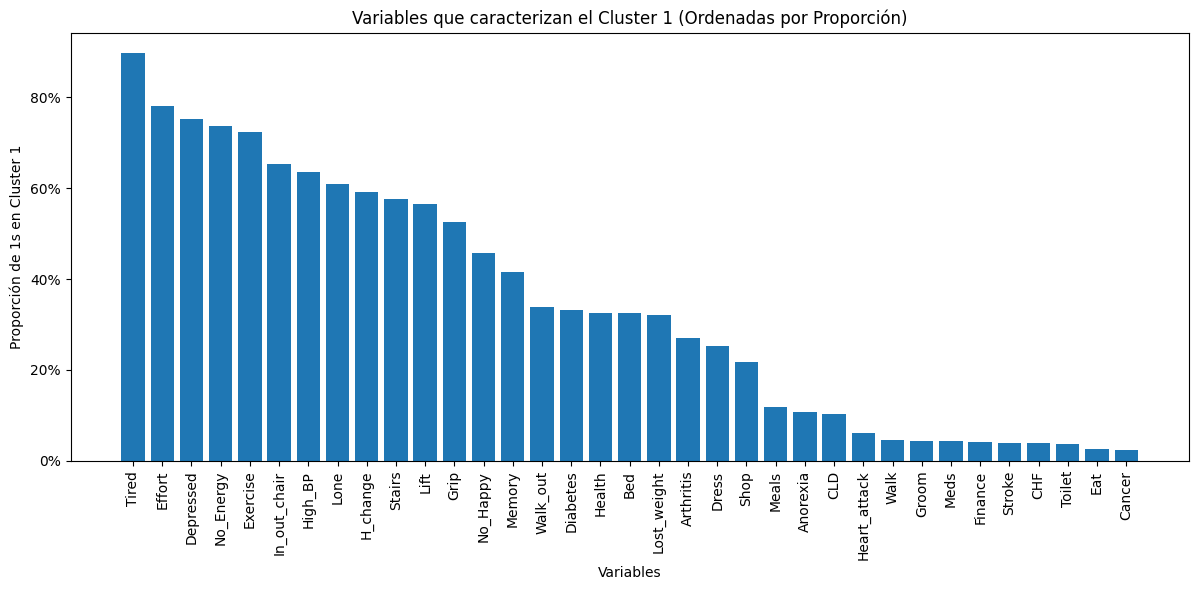

DataFrame for Cluster 1:

           index  Cluster 1
16         Tired   0.896391
18        Effort   0.780647
19     Depressed   0.752645
22     No_Energy   0.736154
34      Exercise   0.723086
1   In_out_chair   0.653703
23       High_BP   0.634412
21          Lone   0.609832
14      H_change   0.590541
6         Stairs   0.576540
7           Lift   0.565339
32          Grip   0.526136
20      No_Happy   0.457996
31        Memory   0.415370
17      Walk_out   0.338519
28      Diabetes   0.332607
13        Health   0.325451
15           Bed   0.325140
12   Lost_weight   0.320162
29     Arthritis   0.270380
0          Dress   0.252956
8           Shop   0.217797
9          Meals   0.118855
33      Anorexia   0.108276
30           CLD   0.102987
24  Heart_attack   0.061294
2           Walk   0.046360
4          Groom   0.043559
10          Meds   0.043559
11       Finance   0.041693
26        Stroke   0.039515
25           CHF   0.039203
5         Toilet   0.036714
3            Eat   0.0

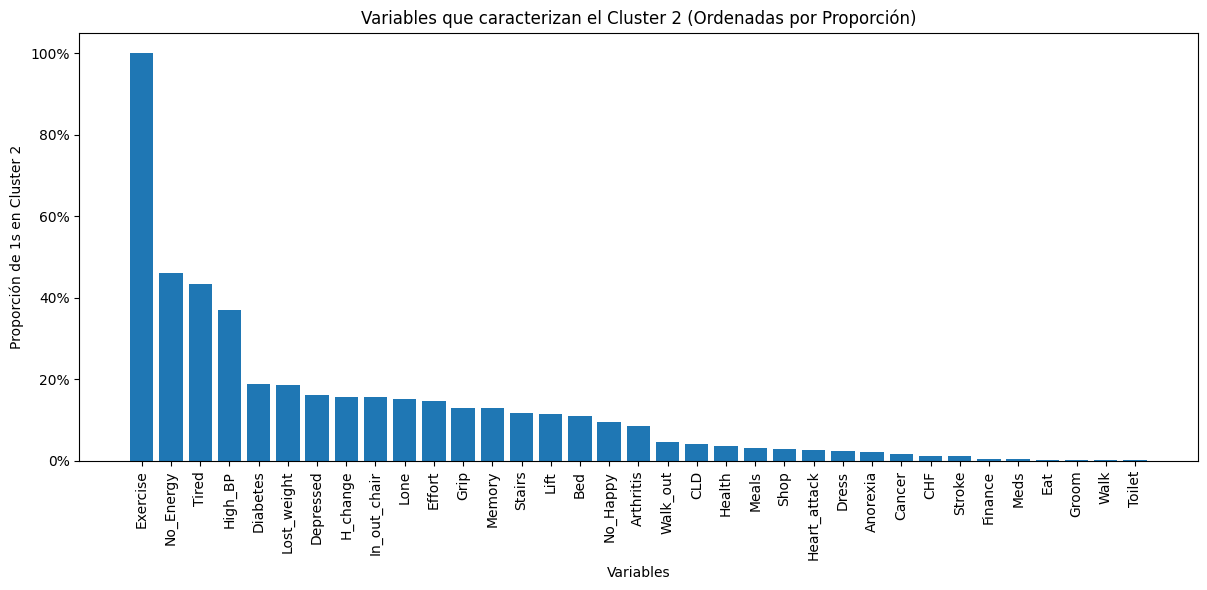

DataFrame for Cluster 2:

           index  Cluster 2
34      Exercise   1.000000
22     No_Energy   0.462179
16         Tired   0.433495
23       High_BP   0.369188
28      Diabetes   0.189220
12   Lost_weight   0.185751
19     Depressed   0.160999
14      H_change   0.157992
1   In_out_chair   0.155679
21          Lone   0.151978
18        Effort   0.147351
32          Grip   0.130465
31        Memory   0.130234
6         Stairs   0.118436
7           Lift   0.115198
15           Bed   0.110109
20      No_Happy   0.095767
29     Arthritis   0.085126
17      Walk_out   0.047421
30           CLD   0.042563
13        Health   0.036549
9          Meals   0.032385
8           Shop   0.028452
24  Heart_attack   0.026371
0          Dress   0.023826
33      Anorexia   0.022901
27        Cancer   0.016424
25           CHF   0.012029
26        Stroke   0.011797
11       Finance   0.004626
10          Meds   0.004164
3            Eat   0.002776
4          Groom   0.002313
2           Walk   0.0

In [ ]:
# Hacemos un bucle para cada clúster (clústeres 0, 1, and 2)
for cluster_num in range(3):
    # Datos filtrados para cada clúster
    X_cluster = X[X['clusters_k=3'] == cluster_num]

    # Calculamos la proporción (utilizando la media) en cada clúster
    total_observaciones = len(X_cluster)
    proporciones_dict = {}
    for column in X_cluster.drop(columns=['clusters_k=3']).columns:
        proporciones = X_cluster[column].sum()/total_observaciones #Proporcion en relacion al total
        proporciones_dict[column] = proporciones

    # Creamos un dataframe con el diccionario y lo ordenamos de mayor a menor
    proporciones_df = pd.DataFrame(proporciones_dict, index=[f'Cluster {cluster_num}']).T
    proporciones_df.reset_index(inplace=True)
    proporciones_df = proporciones_df.sort_values(by=[f'Cluster {cluster_num}'], ascending=False)

    # Creamos un gráfico de barras para cada clúster
    plt.figure(figsize=(12, 6))
    plt.bar(proporciones_df['index'], proporciones_df[f'Cluster {cluster_num}'])
    plt.xticks(rotation=90)
    plt.xlabel('Variables')
    plt.ylabel(f'Proporción de 1s en Cluster {cluster_num}')
    plt.title(f'Variables que caracterizan el Cluster {cluster_num} (Ordenadas por Proporción)')
    plt.tight_layout()
    # Formateamos las etiquetas de las barras como porcentajes
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    plt.show()
    plt.show()

    # Imprimimos el df ordenado para cada clúster
    print(f"DataFrame for Cluster {cluster_num}:\n")
    print(proporciones_df)
    print("\n" + "-" * 50 + "\n")  # línea separadora entre clústeres

Resumen
- Clúster 0: Identifica al grupo que destaca porque los individuos no tiene dificultad para ejercitarse y  en  mayor proporción solamente tiene  estas caracteristicas (cansancio, hipertensión y sin energía) y cuyas porporciones están cerca de 0.5.

  Podríamos nombrar a este grupo como el de las personas relativamente sanas cuyos déficits recaen en el cansancio y la energía, por lo que podría tratarse de personas jóvenes-adultas que se mantienen continuamente ocupados o que ejercitan su cuerpo a menudo. No presentan dificultades para actividades diarias como caminar o vestirse.

- Clúster 1: Identifica al grupo de mayor número de cansados (90%), con mayor dificultad para ejercitarse (72%). Más de 9 de sus características (déficits) están por encima de 0.5.

  Este grupo podría constituir a personas de edad más avanzada, menos saludable y con más dificultades para ciertas actividades. Son las que más porcentaje de depresión presentan, ya que los de tercera edad suelen sentirse solos.

- Clúster 2:Identifica al grupo donde el 100% presenta dificultad para ejercitarse, y el resto de características está por debajo del 50%. Casi la mitad presenta hipertensión arterial.

  Son personas que no presentan muchos problemas de salud, pero simplemente no se ejercitan. Un pequeño porcentaje presenta dificultad para levantarse de la cama, pero casi nadie presenta dificultad para caminar o ir al baño. Son personas independientes y, en genral, sanas, por lo que podría constituir la población de mediana edad.


### Modelo con k=2

Siguiendo las instrucciones del ejercicio vamos a evaluar el modelo para k=2.

Repetimos el mismo código pero para k=2.

In [ ]:
# prompt: quitar la columna clusters_k=3

# Drop the 'clusters_k=3' column
X = X.drop(columns=['clusters_k=3'])

In [ ]:
k_select = 2
#Aplicamos  K-means con el k seleccionado
kmeans_select = KMeans(n_clusters= k_select, random_state=42)
X['clusters_k=2'] = kmeans_select.fit_predict(X)

In [ ]:
print(X['clusters_k=2'].value_counts().sort_values())

clusters_k=2
1    3798
0    7185
Name: count, dtype: int64


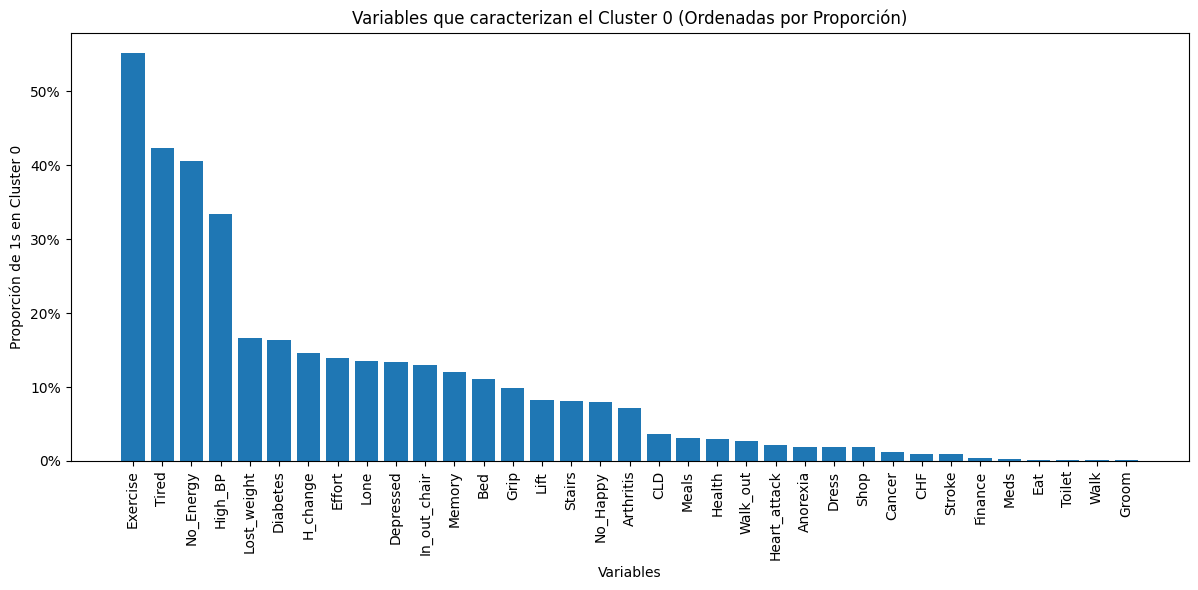

DataFrame for Cluster 0:

           index  Cluster 0
34      Exercise   0.551566
16         Tired   0.423800
22     No_Energy   0.405985
23       High_BP   0.334029
12   Lost_weight   0.165901
28      Diabetes   0.164092
14      H_change   0.145720
18        Effort   0.139875
21          Lone   0.135839
19     Depressed   0.133890
1   In_out_chair   0.129576
31        Memory   0.120807
15           Bed   0.110647
32          Grip   0.098817
7           Lift   0.081976
6         Stairs   0.081002
20      No_Happy   0.079610
29     Arthritis   0.072095
30           CLD   0.036604
9          Meals   0.030619
13        Health   0.029228
17      Walk_out   0.027279
24  Heart_attack   0.022129
33      Anorexia   0.019485
0          Dress   0.018511
8           Shop   0.018372
27        Cancer   0.011969
25           CHF   0.010021
26        Stroke   0.009047
11       Finance   0.003897
10          Meds   0.002366
3            Eat   0.001253
5         Toilet   0.001113
2           Walk   0.0

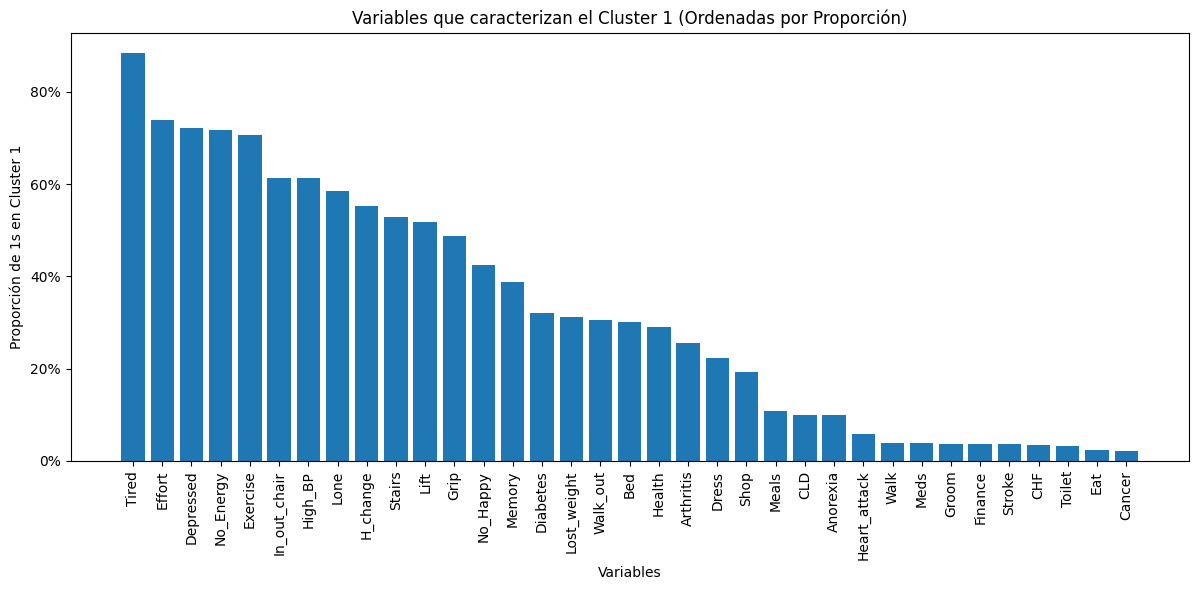

DataFrame for Cluster 1:

           index  Cluster 1
16         Tired   0.883886
18        Effort   0.738547
19     Depressed   0.722222
22     No_Energy   0.716693
34      Exercise   0.706688
1   In_out_chair   0.614271
23       High_BP   0.612691
21          Lone   0.584518
14      H_change   0.553449
6         Stairs   0.529753
7           Lift   0.518167
32          Grip   0.488678
20      No_Happy   0.425224
31        Memory   0.388099
28      Diabetes   0.319905
12   Lost_weight   0.311480
17      Walk_out   0.304634
15           Bed   0.301738
13        Health   0.290943
29     Arthritis   0.255924
0          Dress   0.223802
8           Shop   0.192996
9          Meals   0.107952
30           CLD   0.098999
33      Anorexia   0.098736
24  Heart_attack   0.057662
2           Walk   0.040021
10          Meds   0.038178
4          Groom   0.037651
11       Finance   0.037125
26        Stroke   0.036335
25           CHF   0.035545
5         Toilet   0.031596
3            Eat   0.0

In [ ]:
# Hacemos un bucle para cada clúster(clústeres 0, 1)
for cluster_num in range(2):
    # Datos filtrados para cada clúster
    X_cluster = X[X['clusters_k=2'] == cluster_num]

    # Calculamos la proporción (utilizando la media) en cada clúster
    total_observaciones = len(X_cluster)
    proporciones_dict = {}
    for column in X_cluster.drop(columns=['clusters_k=2']).columns:
        proporciones = X_cluster[column].sum()/total_observaciones #Proporción en relación al total
        proporciones_dict[column] = proporciones

    # Creamos un dataframe con el diccionario y lo ordenamos de mayor a menor
    proporciones_df = pd.DataFrame(proporciones_dict, index=[f'Cluster {cluster_num}']).T
    proporciones_df.reset_index(inplace=True)
    proporciones_df = proporciones_df.sort_values(by=[f'Cluster {cluster_num}'], ascending=False)

    # Creamos un gráfico de barras para cada clúster
    plt.figure(figsize=(12, 6))
    plt.bar(proporciones_df['index'], proporciones_df[f'Cluster {cluster_num}'])
    plt.xticks(rotation=90)
    plt.xlabel('Variables')
    plt.ylabel(f'Proporción de 1s en Cluster {cluster_num}')
    plt.title(f'Variables que caracterizan el Cluster {cluster_num} (Ordenadas por Proporción)')
    plt.tight_layout()
    # Formateamos las etiquetas de las barras como porcentajes
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    plt.show()
    plt.show()

    # Imprimimos el df ordenado para cada clúster
    print(f"DataFrame for Cluster {cluster_num}:\n")
    print(proporciones_df)
    print("\n" + "-" * 50 + "\n")  # línea separadora entre clúster

Resumen
- Clúster 0: Identifica al grupo de mejores condiciones, por debajo del 50% (cansado, sin energía y presión alta), cuya mayoría (55%) presenta dificultad para ejercitarse.

- Clúster 1: Identifica al grupo de mayores problemas, el 90% cansado, 74 y 71 porciento deprimido y sin energía respectivamente. La inmensa mayoría tiene problemas para ejercitarse, levantarse y sentarse en la silla, y se sienten solos.

Por lo tanto, la distinción de grupos que se hace con la clasificación k-means cuando k=2, es una separación que a priori parece entre población de edad avanzada y población adulta.

## 5. Comparativa de modelos

Ambos modelos reflejan limitaciones para este conjunto de datos.

Tenemos que:

* En el caso de **KNN (K vecinos más cercanos)**, llegamos a la conclusión de que existía un sobreajuste en el modelo, pues las métricas con los datos de prueba eran bastante malas, en comparación con el buen funcionamiento del modelo con los datos de entrenamiento.

  Si usásemos este modelo para predecir los fallecimientos, fallaríamos en más de la mitad de los casos.

* En el caso de **k-means**, la métrica de silueta está alrededor de los 0,2 para el valor óptimo k = 2. Como la métrica de silueta oscila entre -1 y 1 (cuanto más cerca del 1 estemos, mejor definidos serán nuestros clústeres), el valor que obtuvimos de 0.202 sugiere que los clústeres están formados, pero no tienen fronteras bien definidas, y algunas muestras pueden estar cercanas a los bordes entre grupos.

  Esto puede indicar que dividir los datos en 2 clústeres no refleja bien la estructura de los datos.

  k = 3 (valor de silueta: 0.069):
Este valor es aún más bajo que el de k = 2, lo que sugiere que aumentar el número de clústeres a 3 empeora la calidad del clustering. Es probable que los clústeres estén menos definidos y haya más solapamiento.  

En conclusión:

1. La comparación entre k-means y KNN parte de que ambos algoritmos tienen propósitos diferentes: **k-means es un método de aprendizaje no supervisado diseñado para descubrir clusters basados en distancias, mientras que k-NN es un algoritmo supervisado utilizado para clasificar o realizar regresiones** basándose en los vecinos más cercanos de cada punto. En un contexto donde la métrica de silueta en k-means es baja (e.g., 0.2), esto podría reflejar clústeres mal definidos, lo que indicaría una estructura de datos débil o superpuesta, dificultando la segmentación efectiva.

2. Desde una perspectiva práctica, **k-means es útil para segmentación exploratoria cuando no se tienen etiquetas**, aunque su desempeño depende de suposiciones como la convexidad de los clusters. En contraste, **KNN requiere etiquetas en el conjunto de entrenamiento** y es más robusto frente a distribuciones complejas, ya que solo evalúa los vecinos locales. Sin embargo, el ruido y la falta de una clara separación de clusters, como se sugiere en este caso, pueden impactar ambos métodos, siendo necesario explorar alternativas como DBSCAN o algoritmos jerárquicos.

3. En conjunto, **k-means puede ser un paso previo para identificar grupos aproximados que alimenten un modelo supervisado como KNN**. Sin embargo, un valor bajo de la métrica de silueta en k-means pone en duda la calidad de la segmentación inicial, limitando la validez de los clusters como input para tareas supervisadas o de clasificación.